In [83]:
# Import pandas,numpy & random
import pandas as pd
import numpy as np

In [84]:
# Import Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=0.8)

In [85]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

                                   ### Βασικές Πληροφορίες Dataset ###
 Στο Dataset αυτό, έχουμε 891 καταχωρήσεις επιβατών του Τιτανικού. Ανάμεσα στα στοιχεία βρίσκουμε Ονόματα, Φύλο, Ηλικία, σημείο επιβίβασης κ.α. 
Στην λίστα αυτή επίσης, βλέπουμε και το ποιοι από αυτούς τους επιβάτες, κατάφεραν να επιβιώσουν του ναυαγίου.

In [86]:
print(list(train_df))
print('-'*100)
print('Ο συνολικός αριθμός των στηλών είναι: ',len(list(train_df))) # Ο αριθμός των στηλών

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
----------------------------------------------------------------------------------------------------
Ο συνολικός αριθμός των στηλών είναι:  12


In [87]:
print(train_df.info()) # Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [88]:
train_df.head() # Εμφάνιση των πρώτων 5 γραμμών του Dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


                                ΘΑ ΦΤΙΑΞΟΥΜΕ ΝΕΑ ΣΤΗΛΗ ΜΕ ΔΙΑΧΩΡΙΣΜΟ MALE/FEMALE & CHILD
                                 ΕΤΣΙ ΩΣΤΕ ΝΑ ΞΕΧΩΡΙΣΟΥΜΕ ΤΑ ΠΑΙΔΙΑ ΠΟΥ ΗΤΑΝ ΣΤΟ ΠΛΟΙΟ
                                 
                                ΑΠΟ ΤΗ ΣΤΙΓΜΗ ΠΟΥ ΥΠΑΡΧΕΙ Η ΝΕΑ ΣΤΗΛΗ PERSON ΔΕΝ ΧΡΕΙΑΖΟΜΑΣΤΕ
                                                ΠΛΕΟΝ ΤΗΝ ΣΤΗΛΗ SEX

In [89]:
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex

In [90]:
train_df['Person'] = train_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)
train_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

In [91]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female


                                 Μία γρήγορη ματιά στο Dataset.
                                             ΑΡΙΘΜΟΙ

                                ###### ΣΥΝΟΛΙΚΟΣ ΑΡΙΘΜΟΣ ΕΠΙΒΑΤΩΝ #######

In [92]:
print('Ο συνολικός αριθμός των επιβατών είναι:',len(list(train_df['PassengerId'])))

Ο συνολικός αριθμός των επιβατών είναι: 891


                                ######## ΕΠΙΒΑΤΕΣ ΑΝΑ ΚΛΑΣΗ ########

In [93]:
print(train_df.groupby(['Pclass']).size())

Pclass
1    216
2    184
3    491
dtype: int64


                                ######## ΕΠΙΒΑΤΕΣ ΑΝΑ ΦΥΛΛΟ ########

In [94]:
print(train_df.groupby(['Person']).size())

Person
child      83
female    271
male      537
dtype: int64


                                ######### ΕΠΙΒΑΤΕΣ ΑΝΑ ΛΙΜΑΝΙ ΕΠΙΒΙΒΑΣΗΣ ######

In [95]:
print(train_df.groupby(['Embarked']).size())

Embarked
C    168
Q     77
S    644
dtype: int64


                                    ####### ΕΠΙΒΑΤΕΣ ΠΟΥ ΣΩΘΗΚΑΝ #########

In [96]:
print(train_df.groupby(['Survived']).size())

Survived
0    549
1    342
dtype: int64


                                            ΔΙΑΓΡΑΜΜΑΤΑ

                              ####### ΣΥΝΟΛΟ ΕΠΙΒΑΤΩΝ ΑΝΑ ΚΛΑΣΗ ##########

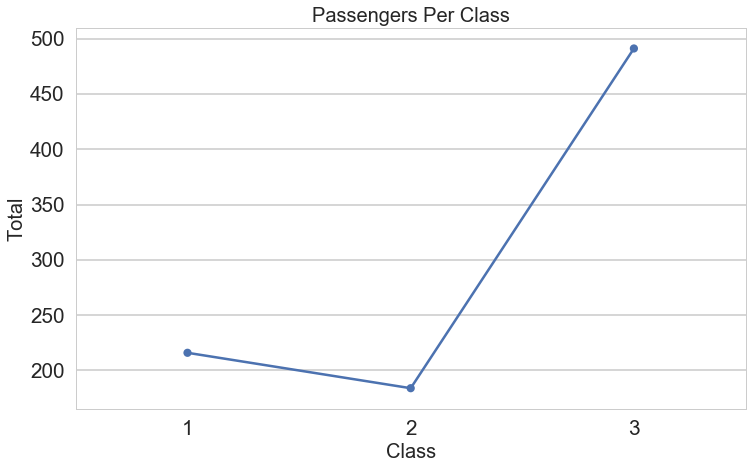

In [97]:
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=1.3)
ax = sns.pointplot(x=sorted(train_df.Pclass.unique()), y = train_df.groupby(['Pclass']).size(),
              scale=0.5)
ax.axes.set_title("Passengers Per Class",fontsize=20)
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Total",fontsize=20)

                              ########## ΣΥΝΟΛΟ ΕΠΙΒΑΤΩΝ ΑΝΑ ΦΥΛΛΟ ###########

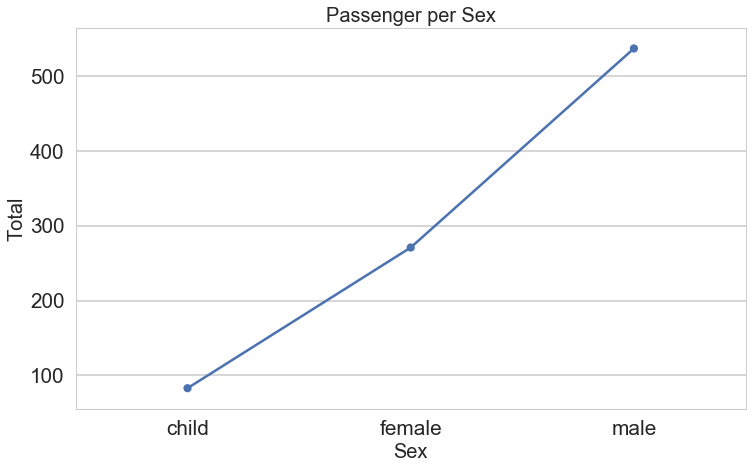

In [98]:
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=1.3)
ax = sns.pointplot(x=sorted(train_df.Person.unique()), y = train_df.groupby(['Person']).size(),
              scale=0.5)
ax.axes.set_title("Passenger per Sex",fontsize=20)
ax.set_xlabel("Sex",fontsize=20)
ax.set_ylabel("Total",fontsize=20)

                          ####### ΣΥΝΟΛΟ ΕΠΙΒΑΤΩΝ ΑΝΑ ΛΙΜΑΝΙ ΕΠΙΒΙΒΑΣΗΣ ##########

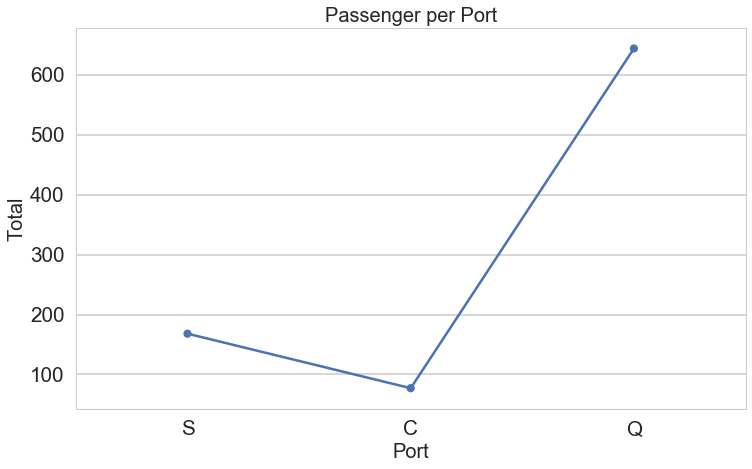

In [99]:
x = train_df.Embarked.unique()
x = x[~pd.isnull(x)]

plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=1.3)
ax = sns.pointplot (x, y = train_df.groupby(['Embarked']).size(),
              scale=0.5)
ax.axes.set_title("Passenger per Port",fontsize=20)
ax.set_xlabel("Port",fontsize=20)
ax.set_ylabel("Total",fontsize=20)

                                  ####### ΣΥΝΟΛΟ ΕΠΙΒΑΤΩΝ ΑΝΑ ΗΛΙΚΙΑ #########

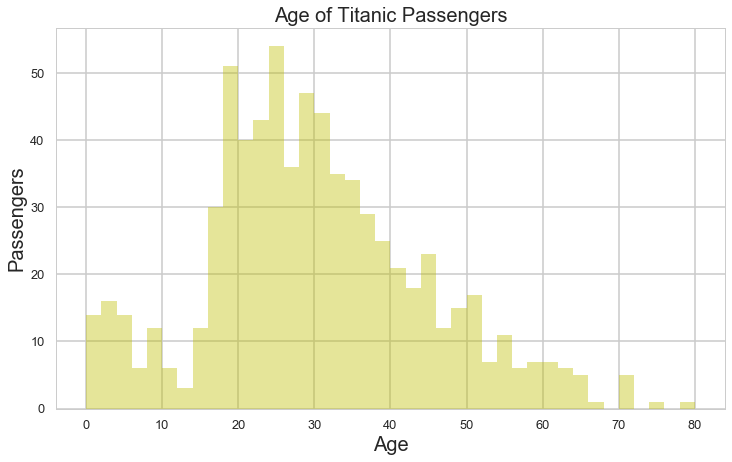

In [100]:
#train_df['Age'].hist(bins=40,color='darkred',alpha=0.7)
x = train_df['Age'].dropna()

bins = np.arange(0, 82, 2)
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.set_context('poster',font_scale=0.8)
ax = sns.distplot(x, kde=False, bins = bins, color = 'y')
ax.axes.set_title("Age of Titanic Passengers",fontsize=20)
ax.set_xlabel("Age",fontsize=20)
ax.set_ylabel("Passengers",fontsize=20)

#plt.savefig('Age.png')

                                            ΑΡΙΘΜΟΙ

                            ####### ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΑΝΑ ΚΛΑΣΗ ########

In [101]:
print (train_df[['Pclass', 'Survived']].groupby(['Pclass'], 
                as_index=False).mean().sort_values(by='Survived', ascending=False))
print('-'*100)
a = train_df[["Pclass", "Survived"]].groupby(['Pclass'], 
                as_index=False).sum().sort_values(by='Survived', ascending=False)
a['Percentage']= a['Survived']/a['Survived'].sum()
print(a)

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
----------------------------------------------------------------------------------------------------
   Pclass  Survived  Percentage
0       1       136    0.397661
2       3       119    0.347953
1       2        87    0.254386


                            ######### ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΑΝΑ ΦΥΛΛΟ ########

In [102]:
print (train_df[['Person', 'Survived']].groupby(['Person'], 
                as_index=False).mean().sort_values(by='Survived', ascending=False))
print('-'*100)
b = train_df[["Person", "Survived"]].groupby(['Person'], 
                as_index=False).sum().sort_values(by='Survived', ascending=False)
b['Percentage']= b['Survived']/b['Survived'].sum()
print(b)

   Person  Survived
1  female  0.756458
0   child  0.590361
2    male  0.163873
----------------------------------------------------------------------------------------------------
   Person  Survived  Percentage
1  female       205    0.599415
2    male        88    0.257310
0   child        49    0.143275


                        ###### ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΑΝΑ ΛΙΜΑΝΙ ΕΠΙΒΙΒΑΣΗΣ #######

In [103]:
print (train_df[['Embarked', 'Survived']].groupby(['Embarked'], 
                as_index=False).mean().sort_values(by='Survived', ascending=False))
print('-'*100)
c = train_df[["Embarked", "Survived"]].groupby(['Embarked'], 
                as_index=False).sum().sort_values(by='Survived', ascending=False)
c['Percentage']= c['Survived']/c['Survived'].sum()
print(c)

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
----------------------------------------------------------------------------------------------------
  Embarked  Survived  Percentage
2        S       217    0.638235
0        C        93    0.273529
1        Q        30    0.088235


                                            ΔΙΑΓΡΑΜΜΑΤΑ

                        ##### ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΜΕ ΒΑΣΗ ΤΗΝ ΗΛΙΚΙΑ ##########

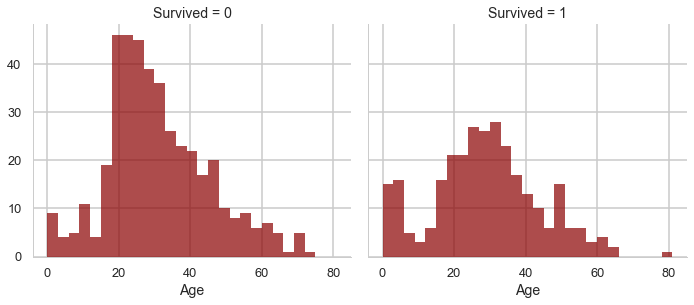

In [104]:
bins = np.arange(0, 82, 3)
g = sns.FacetGrid(train_df, col="Survived", size=4.5, aspect=1.1)
g = g.map(plt.hist, "Age", color="darkred", alpha=0.7, bins=bins)
#plt.savefig('Age2.png')

                        ###### ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΜΕ ΒΑΣΗ ΤΗΝ ΚΛΑΣΗ ######

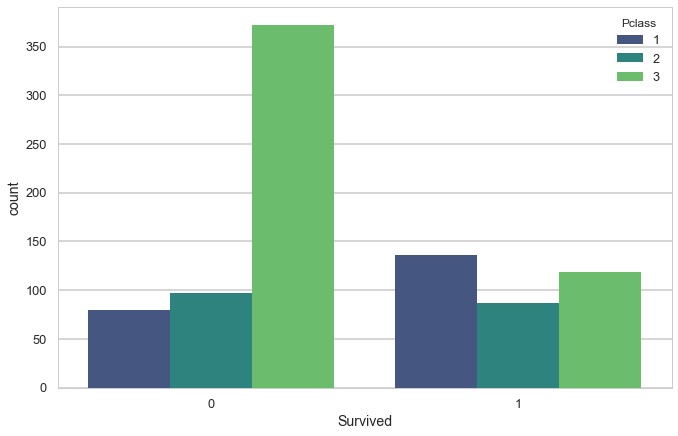

In [105]:
plt.figure(figsize=(11,7))
sns.set_context(font_scale=1.3)
sns.countplot(x='Survived',hue='Pclass',data=train_df,palette='viridis')

                            ######### ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΜΕ ΒΑΣΗ ΤΟ ΦΥΛΛΟ #######

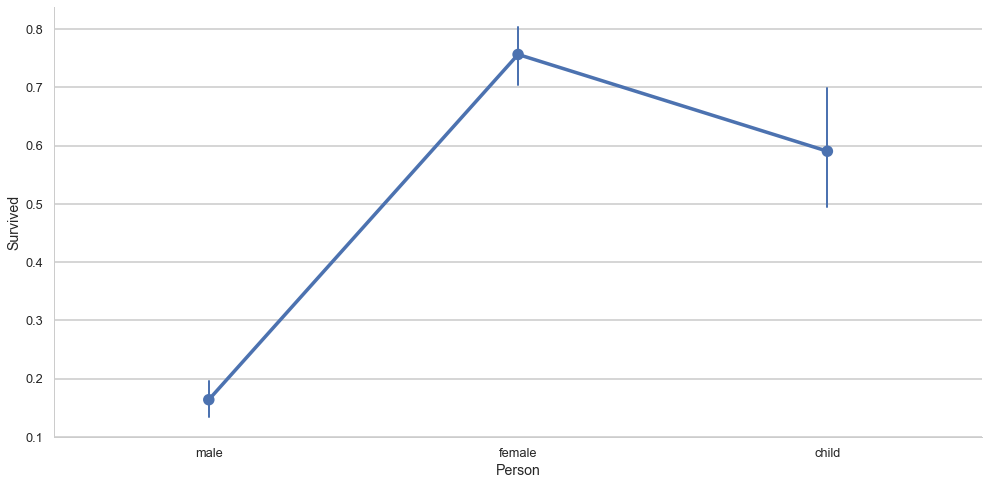

In [106]:
sns.factorplot('Person','Survived', data=train_df,size=7,aspect=2, 
               errwidth = 2, scale = 0.7)

                            ########## ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΜΕ ΒΑΣΗ ΤΟ ΛΙΜΑΝΙ ΕΠΙΒΙΒΑΣΗΣ ########

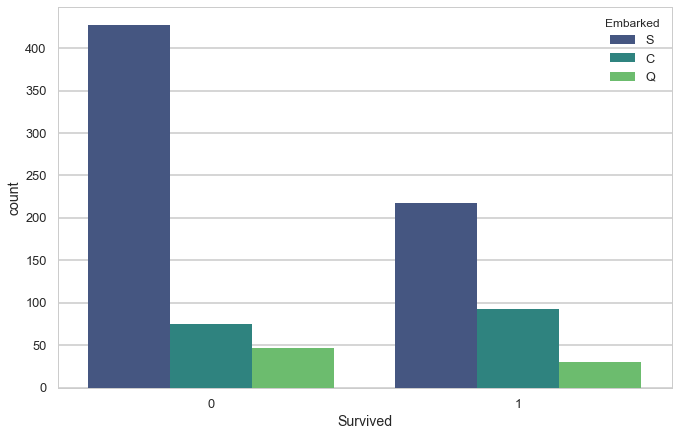

In [107]:
plt.figure(figsize=(11,7))
sns.set_context(font_scale=1.3)
sns.countplot(x='Survived',hue='Embarked',data=train_df,palette='viridis')

                       ######## ΕΛΕΓΧΟΣ ΕΠΙΒΙΩΣΗΣ ΜΕ ΒΑΣΗ ΤΗΝ ΚΛΑΣΗ ΚΑΙ ΤΟ ΦΥΛΟ #######

plt.figure(figsize=(12,8))
sns.set_style('white')
sns.set_context('poster',font_scale=1)
ax = sns.pointplot(x="Pclass", y="Survived", hue='Person',
                   data=train_df, dodge=True, errwidth = 1, scale = 0.4)

plt.figure(figsize=(12,8))
sns.set_style('white')
sns.set_context('poster',font_scale=1)
ax = sns.pointplot(x="Embarked", y="Survived", hue='Person',
                   data=train_df, dodge=True, errwidth = 1, scale = 0.4)

In [108]:
# filter(lambda v: v==v, x)